In [18]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
conn = sqlite3.connect('sales_data.db')

In [7]:
query = 'select * from sales'
new_query = pd.read_sql_query(query, conn)
print(new_query)

     order_id           order_date   sku      color      size  unit_price  \
0           1  2022-06-01 16:05:00   708  Dark Blue       2XL         298   
1           1  2022-06-01 16:05:00    89  Dark Blue       2XL         258   
2           2  2022-06-10 17:03:00  bobo      Cream  One Size         228   
3           3  2022-06-10 19:59:00   799  Dark Blue        XL         264   
4           4  2022-06-11 11:42:00   799  Dark Blue         M         264   
..        ...                  ...   ...        ...       ...         ...   
485       171  2022-09-09 06:27:00   799  Dark Blue         M         265   
486       172  2022-09-09 07:18:00   708  Dark Blue       4XL         278   
487       173  2022-09-09 07:22:00   799  Dark Blue         M         265   
488       174  2022-09-09 08:25:00   799  Dark Blue         L         265   
489       175  2022-09-09 09:47:00   799  Dark Blue        XL         265   

     quantity  revenue  order_month  
0           1      298            6  

In [12]:
query = '''
SELECT
    color,
    SUM(quantity) AS total_qty,
    SUM(unit_price * quantity) AS total_sales
FROM sales
GROUP BY color
'''

df = pd.read_sql_query(query, conn)
print(df)

              color  total_qty  total_sales
0     920 Navy blue          1          227
1    922 Army green          1          207
2         922 Black          1          207
3             Black         13         3892
4     Black Stripes          1          248
5              Blue          4          878
6      Blue Stripes          2          496
7             Brown          1          198
8   Cornflower Blue          1          198
9             Cream          3          610
10        Dark Blue        401       112364
11        Dark Wash          5         1311
12     Gray Stripes          1          255
13        Grey Wash          9         2390
14       Light Blue         26         7337
15       Light Gray          1          228
16       Light Wash          1          238
17           Maroon          1          191
18           Matcha          2          456
19         Mid Wash          8         2043
20    Midnight Blue          2          396
21        Navy Blue          3  

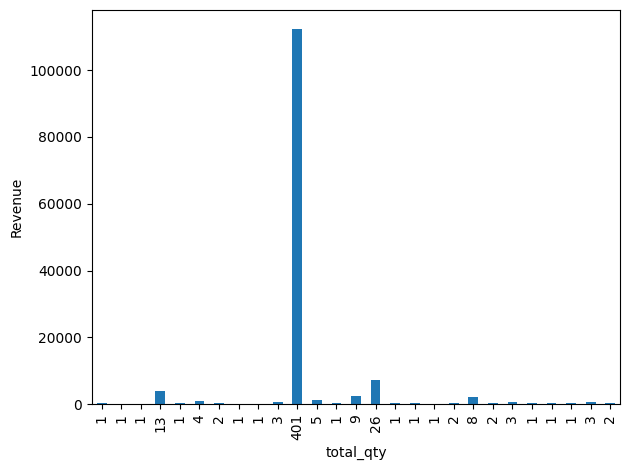

In [21]:
df.plot(kind='bar', x='total_qty', y='total_sales', legend=False)
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()